In [1]:
import healpy as hp
import numpy as np
from tqdm.notebook import tqdm

In [2]:
NSIDE = 2**9
NPIX = hp.nside2npix(NSIDE)

In [3]:
def gaussian2D(r):
    return 1 / (2 * np.pi) * np.exp(-(r**2) * 0.5)

In [4]:
test_map = np.zeros(NPIX)

In [5]:
for i in range(NPIX):
    r = np.rad2deg(hp.rotator.angdist([0, 0, 1], hp.pix2vec(NSIDE, i)))
    if r > 5:
        break
    test_map[i] = gaussian2D(r)

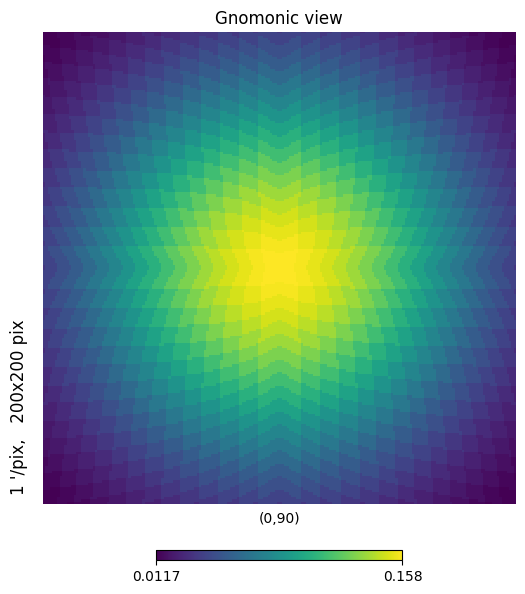

In [6]:
hp.gnomview(test_map, rot=(0, 90), xsize=200, reso=1)

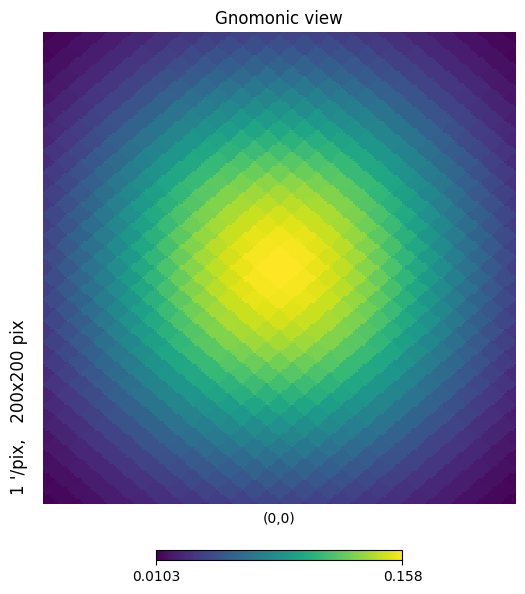

In [7]:
rotator = hp.Rotator(rot=[0, 90], deg=True)
test_map_1 = rotator.rotate_map_pixel(test_map)
hp.gnomview(test_map_1, rot=(0, 0), xsize=200, reso=1)

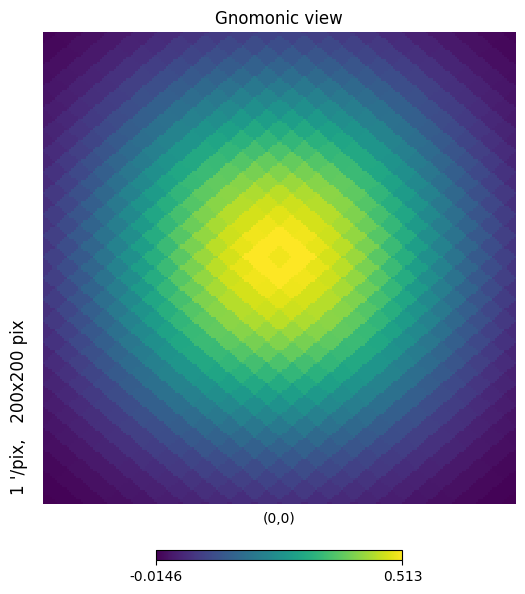

In [8]:
test_map_2 = np.zeros(NPIX)
test_map_2[hp.ang2pix(NSIDE, 0, 0, lonlat=True)] = NPIX / (4 * np.pi)
test_map_2 = hp.smoothing(test_map_2, beam_window=hp.map2alm(test_map, mmax=0))
hp.gnomview(test_map_2, rot=(0, 0), xsize=200, reso=1)

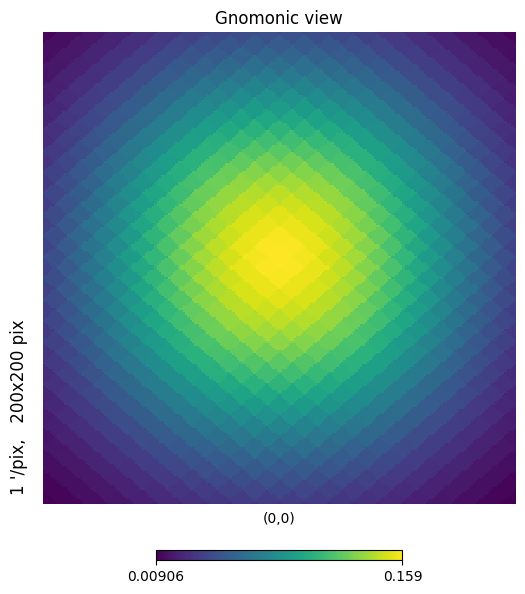

In [9]:
test_map_3 = np.zeros(NPIX)
test_map_3[hp.ang2pix(NSIDE, 0, 0, lonlat=True)] = NPIX / (4 * np.pi)
b = np.linspace(0, np.pi, 100000)
bw = gaussian2D(np.rad2deg(b))
beam = hp.sphtfunc.beam2bl(bw, b, NSIDE * 3-1)
test_map_3 = hp.smoothing(test_map_3, beam_window=beam)
hp.gnomview(test_map_3, rot=(0, 0), xsize=200, reso=1)

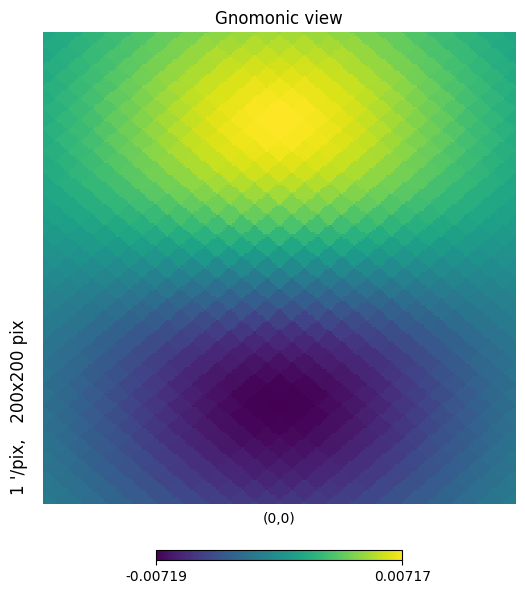

In [10]:
hp.gnomview(test_map_3-test_map_1, rot=(0, 0), xsize=200, reso=1)

/tmp/ipykernel_1016467/3623263479.py:1: RuntimeWarning: divide by zero encountered in divide
  hp.gnomview(test_map_2/test_map_1, rot=(0, 0), xsize=200, reso=1)


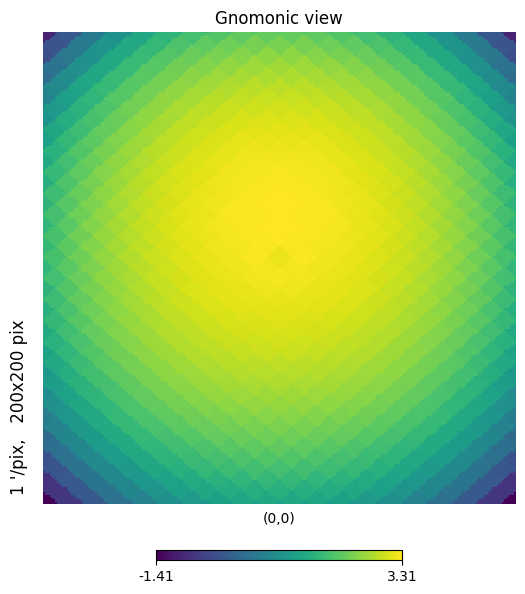

In [11]:
hp.gnomview(test_map_2/test_map_1, rot=(0, 0), xsize=200, reso=1)

/tmp/ipykernel_1016467/3205812288.py:1: RuntimeWarning: divide by zero encountered in divide
  hp.gnomview(test_map_3/test_map_1, rot=(0, 0), xsize=200, reso=1)


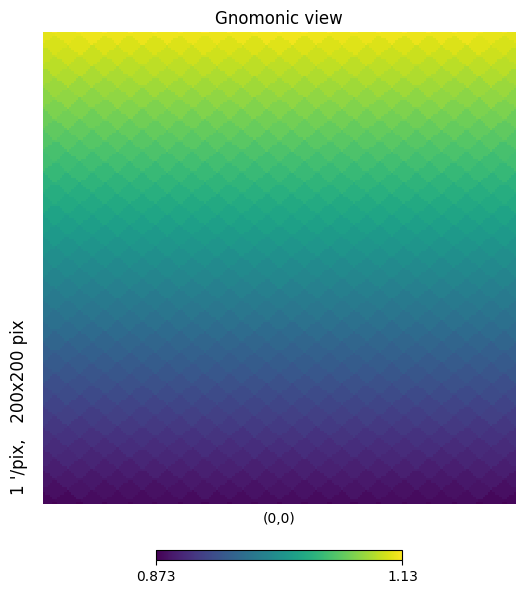

In [12]:
hp.gnomview(test_map_3/test_map_1, rot=(0, 0), xsize=200, reso=1)

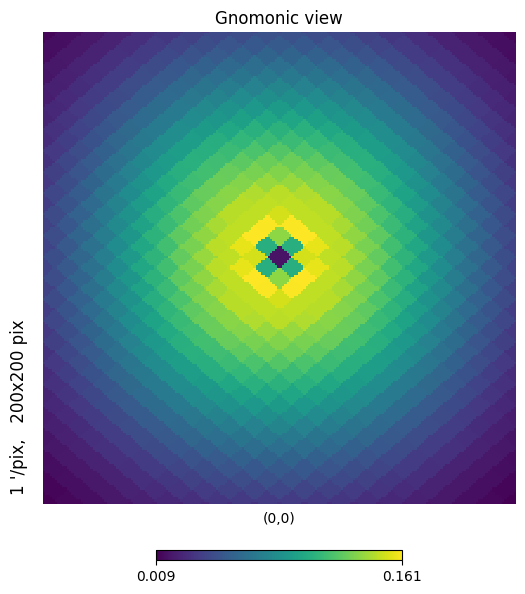

In [24]:
test_map_4 = np.zeros(NPIX)
test_map_4[hp.ang2pix(NSIDE, 0, 0, lonlat=True)] = NPIX / (4 * np.pi)
beam2 = hp.sphtfunc.beam2bl(test_map[:10000], hp.rotator.angdist([0, 0, 1], hp.pix2vec(NSIDE,np.arange(NPIX)))[:10000], NSIDE * 3-1)
test_map_4 = hp.smoothing(test_map_4, beam_window=beam2)
hp.gnomview(test_map_4, rot=(0, 0), xsize=200, reso=1)